In [1]:
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pylab as plt


In [2]:
#This function will download the dataset into your environment
%pip install requests

import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

Note: you may need to restart the kernel to use updated packages.


In [3]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [5]:
download(filename, "auto.csv")
filename = "auto.csv"

In [6]:
df = pd.read_csv(filename, names=headers)

In [7]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
# replace "?" to NaN since it is the default missing value marker in the dataset in python
# and we will use numpy to handle NaN values
# We will use the replace function to replace "?" with np.nan
# np.nan is the numpy representation of a missing value
# We will use the inplace parameter to modify the original dataframe
# inplace=True means that the changes will be made directly to the original dataframe
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
missing_data = df.isnull()
# The isnull() function returns a DataFrame of the same shape as df, with True for missing values and False for non-missing values
# We can use this DataFrame to check for missing values in the dataset
#tru means that the value is missing, and false means that the value is present
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#count the number of missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")  # Print a newline for better readability

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

Deal with missing data
How to deal with missing data?
Drop data
a. Drop the whole row
b. Drop the whole column
Replace data
a. Replace it by mean
b. Replace it by frequency
c. Replace it based on other functions
Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

Replace by mean:

"normalized-losses": 41 missing data, replace them with mean
"stroke": 4 missing data, replace them with mean
"bore": 4 missing data, replace them with mean
"horsepower": 2 missing data, replace them with mean
"peak-rpm": 2 missing data, replace them with mean
Replace by frequency:

"num-of-doors": 2 missing data, replace them with "four".
Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur
Drop the whole row:

"price": 4 missing data, simply delete the whole row
Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

In [11]:
#calculate the mean of the "normalized-losses" column
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [12]:
#replace the missing values in the "normalized-losses" column with the mean
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

/tmp/ipykernel_57402/3642431163.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)


In [13]:
#replacing NaN normalized-losses with the mean
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

/tmp/ipykernel_57402/2590997297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)


In [14]:
#calculating the mean of the "bore" column
avg_bore = df["bore"].astype("float").mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [15]:
#replacing NaN bore with the mean
df["bore"].replace(np.nan, avg_bore, inplace=True)

/tmp/ipykernel_57402/347101815.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bore"].replace(np.nan, avg_bore, inplace=True)


In [16]:
#getting the mean value of the "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of stroke:", avg_stroke)

Average of stroke: 3.255422885572139


In [17]:
#replacing the missing values in the "stroke" column with the mean
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
#inplace=True means that the changes will be made directly to the original dataframe


/tmp/ipykernel_57402/1004602572.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["stroke"].replace(np.nan, avg_stroke, inplace=True)


In [18]:
#calculatind the mean of horse power column
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
print("Average of horsepower:", avg_horsepower)

Average of horsepower: 104.25615763546799


In [19]:
#replacing the missing values in the hordepower column with the mean
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)  


/tmp/ipykernel_57402/1597696960.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)


In [20]:
#calculating the mean value of the "peak-rpm" column
avg_peak_rpm = df["peak-rpm"].astype("float").mean(axis=0)
print("Average of peak-rpm:", avg_peak_rpm)

Average of peak-rpm: 5125.369458128079


In [21]:
#replacing the missing values in the peak-rpm column with the mean
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace=True)

/tmp/ipykernel_57402/3059011239.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace=True)


In [22]:
#--------------------MEDIAN-------------------
#to see the values are present in a particular column , we can use the ".value_counts()" function
#this function will return a series containing counts of unique values in the column
#we can use this function to check the values in the "num-of-doors" column
print(df["num-of-doors"].value_counts())

num-of-doors
four    114
two      89
Name: count, dtype: int64


In [23]:
# we see that four doors are the most common value in the "num-of-doors" column
#we can use the ".idmax()" function to get the most common value in the column
df["num-of-doors"].replace(np.nan, "four", inplace=True)

#so here we have replaced the missing values in the "num-of-doors" column with the most common value
#two were missing values in the "num-of-doors" column, so we replaced them with "four"


/tmp/ipykernel_57402/2841091757.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["num-of-doors"].replace(np.nan, "four", inplace=True)


In [24]:
#finally let us drop all the rows that do not have the price value
df.dropna(subset=["price"], axis=0, inplace=True)
#axis=0 means that we are dropping rows, axis=1 means that we are dropping columns
#inplace=True means that the changes will be made directly to the original dataframe    



In [25]:
#we can reset the index because we have dropped some rows
df.reset_index(drop=True, inplace=True)
#drop=True means that we are not adding the old index as a column in the dataframe

In [26]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [27]:
#we can again check for the missing values in the dataset
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")  # Print a newline for better readability

symboling
symboling
False    201
Name: count, dtype: int64

normalized-losses
normalized-losses
False    201
Name: count, dtype: int64

make
make
False    201
Name: count, dtype: int64

fuel-type
fuel-type
False    201
Name: count, dtype: int64

aspiration
aspiration
False    201
Name: count, dtype: int64

num-of-doors
num-of-doors
False    201
Name: count, dtype: int64

body-style
body-style
False    201
Name: count, dtype: int64

drive-wheels
drive-wheels
False    201
Name: count, dtype: int64

engine-location
engine-location
False    201
Name: count, dtype: int64

wheel-base
wheel-base
False    201
Name: count, dtype: int64

length
length
False    201
Name: count, dtype: int64

width
width
False    201
Name: count, dtype: int64

height
height
False    201
Name: count, dtype: int64

curb-weight
curb-weight
False    201
Name: count, dtype: int64

engine-type
engine-type
False    201
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    201
Name: count, dtype: int64

en

In [28]:
#correcting the data types
# we use the astype() function to convert the data types of the columns

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [29]:
#as we can see some of the columns are not of the corrct data type. numerical  variables should have
#float or int data type, and variables with strings such as categories should have object data type
#for example 'bore' and stroke' are numerical variables that describe the engines, so we should expect them to be of the type float or int
#however, they are of the type object, which means that they are not numerical variables
#we can use the astype() function to convert the data types of the columns

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype(float)
#the reason why we use double brackets is because we are selecting multiple columns
df[["normalized-losses"]] = df[["normalized-losses"]].astype(float)
#we can also convert the "price" column to float
df["price"] = df["price"].astype(float)
#we can also convert the "peak-rpm" column to float
df["peak-rpm"] = df["peak-rpm"].astype(float)

In [30]:
#let us check the data types of the columns again
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [31]:
#data standardization
#this is the process of converting the data into a common format making it easy for the researchers to understand the data
#the fuel consumption in the dataset is given in miles per gallon (mpg) for city and highway
df.head()
#we can convert the miles per gallon to kilometers per liter
#1 mile = 1.60934 kilometers
#1 gallon = 3.78541 liters
#so 1 mile per gallon = 1.60934 / 3.78541
#1 mile per gallon = 0.425144 kilometers per liter
#we can use the following formula to convert miles per gallon to kilometers per liter
#kilometers per liter = miles per gallon * 0.425144
#we can create a new column called "city-L/100km" and "highway-L/100km" to store the values in kilometers per liter
#we can use the following formula to convert miles per gallon to kilometers per liter
#city-L/100km = 235.215 / city-mpg
#highway-L/100km = 235.215 / highway-mpg
#we can use the following code to create the new columns
df["city-L/100km"] = 235.215 / df["city-mpg"]
print("")

print("the transformed data is:")   
df.head()


the transformed data is:


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.200714
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.200714
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.379737
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.800625
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.067500


In [32]:
#transforming mpg to L/100km
df["highway-L/100km"] = 235.215 / df["highway-mpg"]
print("")

#and changing the column to "highway-L/100km"   
df.rename(columns={"highway-mpg": "highway-L/100km"}, inplace=True)

In [33]:
#data normalization
#this is the process of scaling the data to a common range
#we can use the min-max normalization technique to scale the data to a common range
#the min-max normalization technique scales the data to a range between 0 and 1
# the typical normalization s include scaling the variable so that the variable average is  0, scaling the variable so the varianc is 1, or scaling the variable so that the variable is between 0 and 1
#we want to scale the columns lenght, width, and height


#replace the (original value by (original value)/(maximum)
df["length"] = df["length"] / df["length"].max()
df["width"] = df["width"] / df["width"].max()
df["height"] = df["height"] / df["height"].max()

#showing the scaled data
print("The scaled data is:")
df[["length", "width", "height"]].head()


The scaled data is:


,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Text(0.5, 1.0, 'horsepower bins')

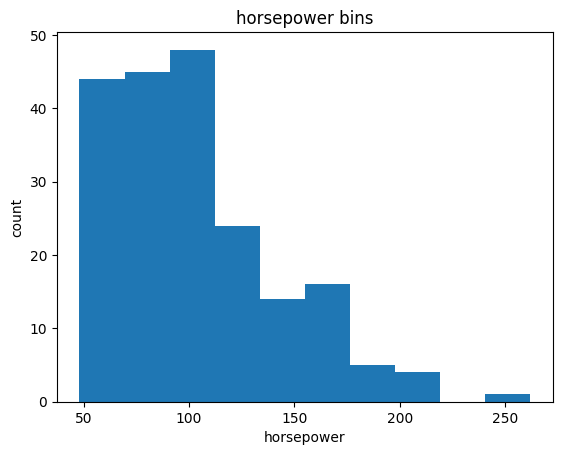

In [36]:
#BINNING
#this is the process of converting a continuous variable into a categorical variable for grouped data analysis
#for example, we can convert the "horsepower" column into a categorical variable by bin
#In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?
# We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.

df["horsepower"] = df["horsepower"].astype(int , copy = True)
#the copy parameter is used to create a copy of the original dataframe, so that we do not modify the original dataframe
#we can use the cut() function to segment the 'horsepower into 3 bins


#visualization of horsepower bins 
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")


Text(0.5, 1.0, 'horsepower bins')

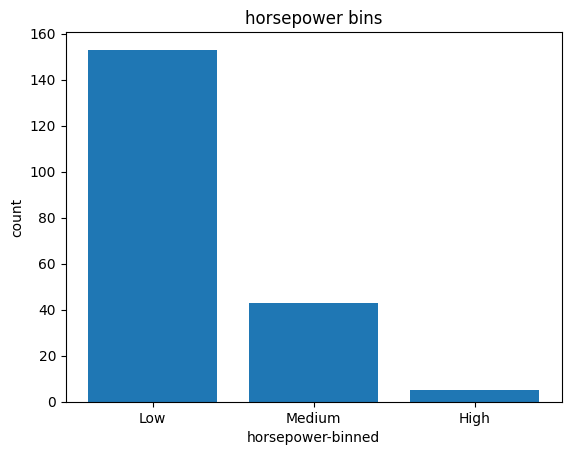

In [38]:
#We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.
# Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).
# Si/nce we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).
# Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.
# We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.

bins =np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

#we set group names for the bins
group_names = ['Low', 'Medium', 'High']

#we apply the function cut() to segment and sort the values into bins
df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels= group_names, include_lowest=True)
df[["horsepower", "horsepower-binned"]].head(20)


#we can see how many values are in each bin
df["horsepower-binned"].value_counts()

#we can plot the bins
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
#plotting the bins
plt.pyplot.bar(group_names, df["horsepower-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("horsepower-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")



Text(0.5, 1.0, 'horsepower bins')

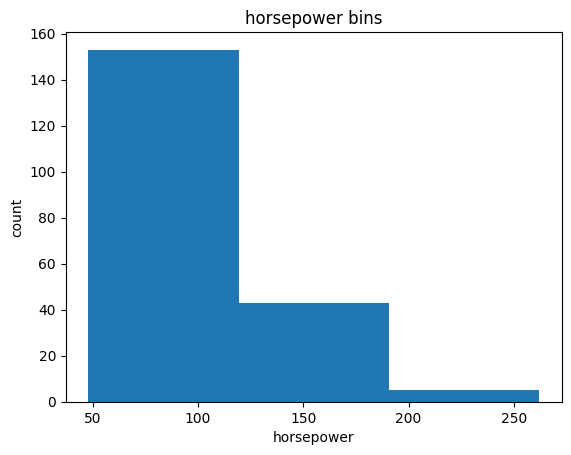

In [40]:
#bins visualization
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [50]:
#indicator variables or dummy variables
#this is the process of converting categorical variables into numerical variables
#they are called dumm varibles because they themselves donot have inherent meaning, but they are used to represent the categorical variables in a numerical format
#we can use the get_dummies() function to convert the categorical variables into numerical variables
#tis is useful for regression analysis, where we need to convert the categorical variables into numerical variables
#for example fuel type is a categorical variable with two values: gas and diesel
#we can convert this variable into two dummy variables: gas and diesel

df.columns

#get the indicator variables and assignmthem to a new dataframe called dummy_variable_1
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

#changing column names for clarity
dummy_variable_1.rename(columns={"gas": "fuel-type-gas", "diesel": "fuel-type-diesel"}, inplace=True)
dummy_variable_1.head()

#in the dataframe column,fuletype-gas has 1 for gas and 0 for diesel, and fuel-type-diesel has 1 for diesel and 0 for gas


#merge dataframe df and dummy_variable_1
df =pd.concat([df, dummy_variable_1] ,axis=1)

#dropping the original column fuel type from df
df.drop("fuel-type", axis=1, inplace=True)

KeyError: 'fuel-type'

In [52]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()



,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [53]:
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)


In [54]:
df.to_csv('clean_auto_df.csv')